# Inpainting using Stable Diffusion
Inpainting is the task of replacing a selected part of an image by generated pixels that make the selection disappear. When working with scientific images, this could be seen as scientific misconduct. Be careful when applying this technique to your microscopy images.

In this notebook we demonstrate the technique using [Stable Diffusion]() the example shown below is modified from [here](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/inpaint).

In [1]:
import PIL
import requests
import torch
from io import BytesIO
from skimage.io import imread
import stackview
import numpy as np
from diffusers import StableDiffusionInpaintPipeline

We set up a Stable Diffusion pipeline and load it to our graphics processing unit.

In [2]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    # "runwayml/stable-diffusion-inpainting", 
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

We load our example image as numpy array.

In [3]:
np_init_image = imread("../../data/real_cat.png")

As huggingface hub models expect images a [pillow images](https://pillow.readthedocs.io/en/stable/reference/Image.html), we need to convert it first.

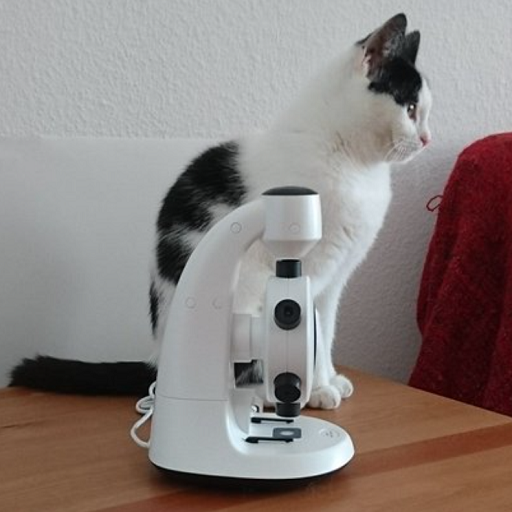

In [4]:
init_image = PIL.Image.fromarray(np_init_image)
init_image

In [5]:
mask_np = imread("../../data/real_cat_mic_mask.tif")

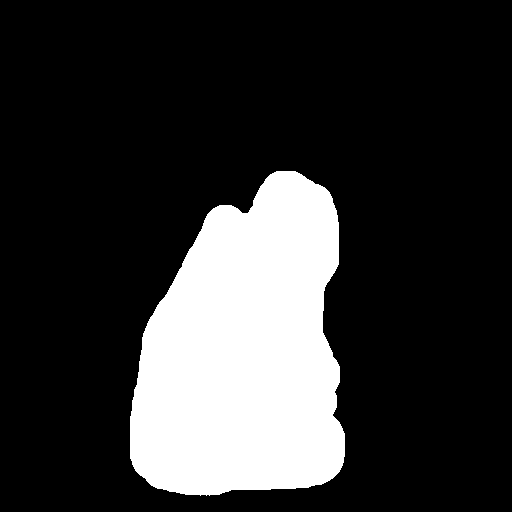

In [6]:
mask_image = np.asarray([mask_np, mask_np, mask_np]).swapaxes(0, 2).swapaxes(0, 1)
mask_image = PIL.Image.fromarray((mask_image * 255).astype(np.uint8))
mask_image

In [7]:
prompt = "A black white cat fur"
image = pipe(prompt=prompt, 
             image=init_image, 
             mask_image=mask_image, 
             num_inference_steps=50, 
             width=512, 
             height=512,
             num_images_per_prompt=1,
            ).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

StackViewNDArray([[[182, 183, 182],
                   [178, 179, 181],
                   [176, 178, 179],
                   ...,
                   [191, 194, 195],
                   [191, 195, 197],
                   [193, 193, 195]],

                  [[181, 183, 183],
                   [180, 180, 182],
                   [177, 178, 179],
                   ...,
                   [190, 193, 194],
                   [190, 193, 196],
                   [192, 194, 197]],

                  [[182, 183, 184],
                   [179, 181, 182],
                   [176, 179, 179],
                   ...,
                   [193, 195, 198],
                   [191, 193, 194],
                   [190, 191, 193]],

                  ...,

                  [[127,  88,  64],
                   [124,  87,  63],
                   [123,  86,  62],
                   ...,
                   [136,  90,  63],
                   [136,  91,  64],
                   [137,  93,  65]],

                  [[127,  87,  61],
                   [125,  88,  60],
                   [123,  87,  61],
                   ...,
                   [139,  93,  65],
                   [138,  90,  65],
                   [136,  89,  63]],

                  [[122,  86,  63],
                   [127,  90,  62],
                   [127,  89,  64],
                   ...,
                   [141,  94,  68],
                   [137,  91,  65],
                   [130,  91,  65]]], dtype=uint8)
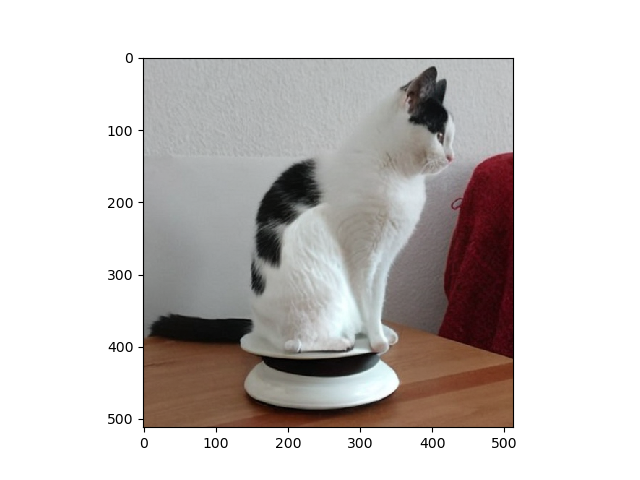
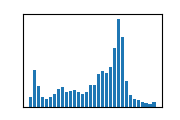

In [8]:
np_image = np.array(image)
stackview.insight(np_image)